<a href="https://colab.research.google.com/github/ar-0911/Data_science/blob/main/GoogleTrendz_visualizing_time_series_and_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df_tesla = pd.read_csv('/content/sample_data/TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('/content/sample_data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('/content/sample_data/Daily Bitcoin Price.csv')
df_unemployement = pd.read_csv('/content/sample_data/UE Benefits Search vs UE Rate 2004-20.csv')

###Tesla
<ul>
<li>shape
<li>number of rows and column
<li>column names
<li>largest and smallest number in the <li>search data column
<li>.describe()

In [4]:
df_tesla.shape

(124, 3)

In [5]:
rows = df_tesla.shape[0]
columns = df_tesla.shape[1]

In [6]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [7]:
df_tesla.TSLA_WEB_SEARCH.max()

31

In [8]:
df_tesla.TSLA_WEB_SEARCH.min()

2

In [9]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


#Unemployement

ue_benefits_web_search = unemployed benefits in web search

In [15]:
df_unemployement

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6
...,...,...,...
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2


In [16]:
df_unemployement.UE_BENEFITS_WEB_SEARCH.max()

100

In [17]:
df_unemployement.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,200.000000,200.000000
mean,10.315000,6.173000
std,10.778061,2.128267
min,4.000000,3.500000
25%,5.000000,4.600000
50%,7.000000,5.400000
75%,12.000000,7.825000
max,100.000000,14.700000


In [14]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [13]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [12]:
df_btc_search.BTC_NEWS_SEARCH.max()

100

In [11]:
df_tesla.isna().values.any() # it has no na values if it returns false

False

In [22]:
df_btc_price.isna().values.any()

False

In [21]:
print(f"No of missing values in BTC price:{df_btc_price.isna().values.sum()}")

No of missing values in BTC price:0


In [18]:
df_btc_price.dropna(inplace=True)

In [19]:
df_btc_price.isna().values.any()

False

Converting string in datetime


In [25]:
df_btc_price.dtypes

DATE       object
CLOSE     float64
VOLUME    float64
dtype: object

In [29]:
df_btc_price['DATE']=pd.to_datetime(df_btc_price.DATE)

In [26]:
df_unemployement.dtypes

MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object

In [32]:
df_unemployement['MONTH']=pd.to_datetime(df_unemployement.MONTH)

In [27]:
df_btc_search.dtypes

MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object

In [33]:
df_btc_search['MONTH']=pd.to_datetime(df_btc_search.MONTH)

In [28]:
df_tesla.dtypes

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

In [35]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

In [36]:
df_btc_search.shape

(73, 2)

In [37]:
df_btc_price.shape

(2203, 3)

In [49]:
df_btc_price_monthly = df_btc_price.resample('M', on='DATE').last()   # resamples as on a monthly basis
                                                              # have to use last as resample no longer returns a dataframe

In [50]:
df_btc_price_monthly.shape

(73, 3)

In [52]:
df_btc_price_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


tesla graph


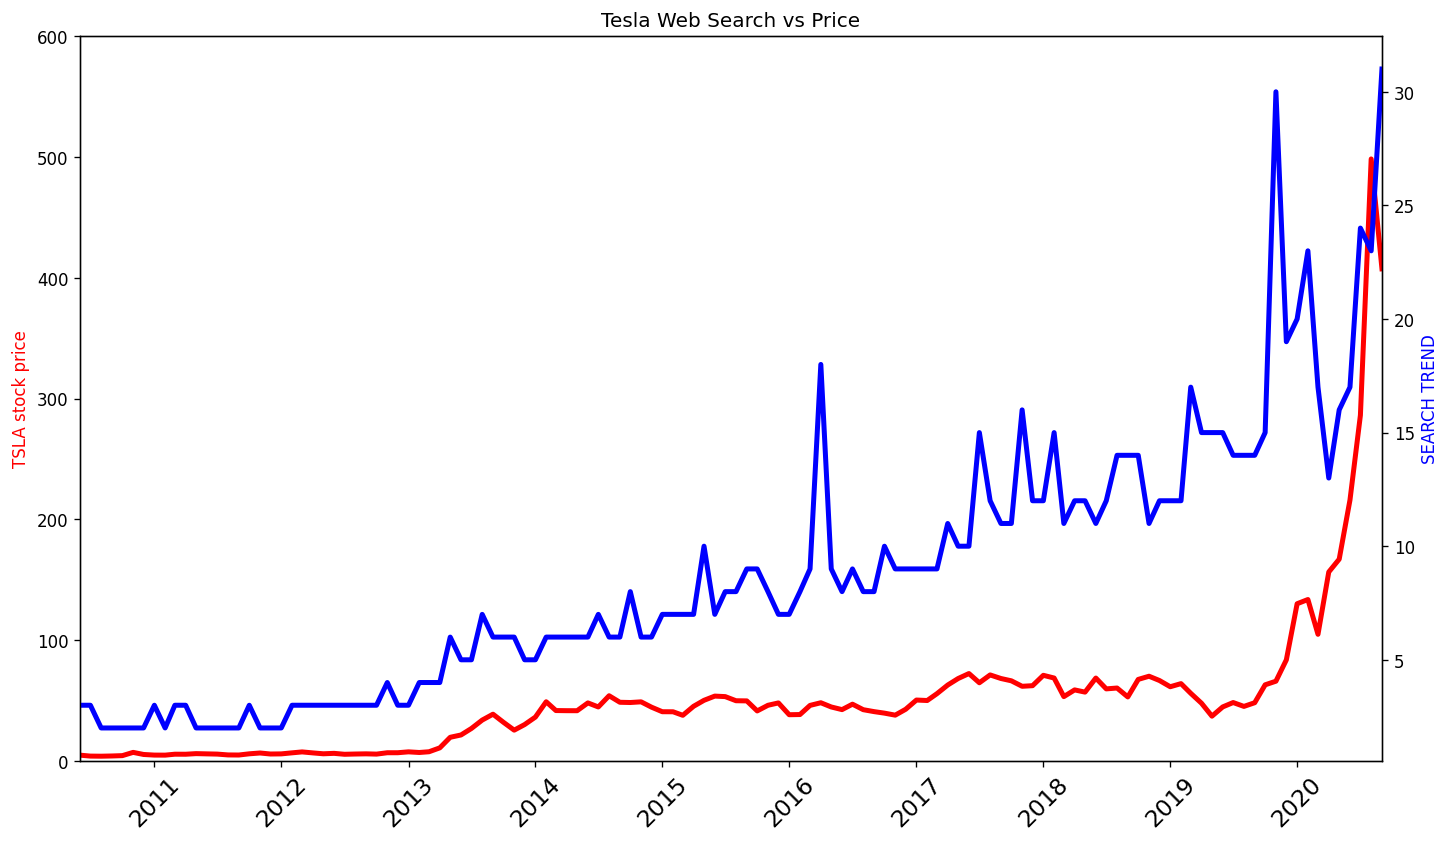

In [83]:
plt.figure(figsize=(14,8),dpi=120)
plt.xticks(fontsize=14,rotation=45)
ax1=plt.gca()
ax2=ax1.twinx()
ax1.set_ylabel('TSLA stock price', color='red')
ax2.set_ylabel('SEARCH TREND', color='b')
plt.xlabel('YEAR',fontsize=14)
plt.title('Tesla Web Search vs Price')

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE,color='red',linewidth=3)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH,color='b',linewidth=3)
plt.show()


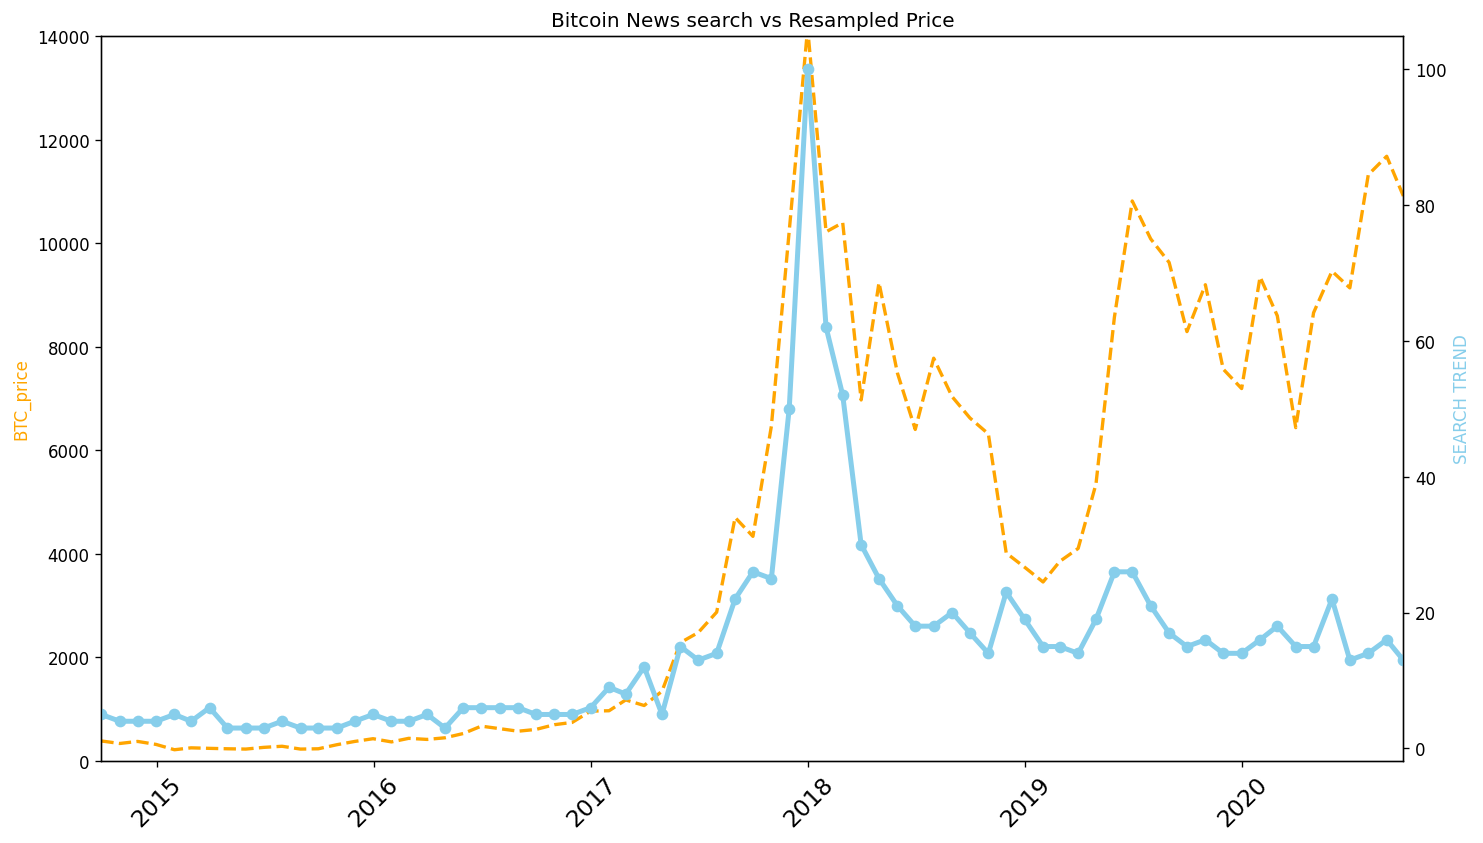

In [86]:
plt.figure(figsize=(14,8),dpi=120)
plt.xticks(fontsize=14,rotation=45)
ax1=plt.gca()
ax2=ax1.twinx()
ax1.set_ylabel('BTC_price', color='orange')
ax2.set_ylabel('SEARCH TREND', color='skyblue')
plt.xlabel('YEAR',fontsize=14)
plt.title('Bitcoin News search vs Resampled Price')

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 14000])
ax1.set_xlim([df_btc_price_monthly.DATE.min(), df_btc_price_monthly.DATE.max()])

ax1.plot(df_btc_price_monthly.DATE, df_btc_price_monthly.CLOSE,color='orange',linewidth=2,linestyle='dashed')
ax2.plot(df_btc_price_monthly.DATE,df_btc_search.BTC_NEWS_SEARCH,color='skyblue',linewidth=3,marker='o')
plt.show()

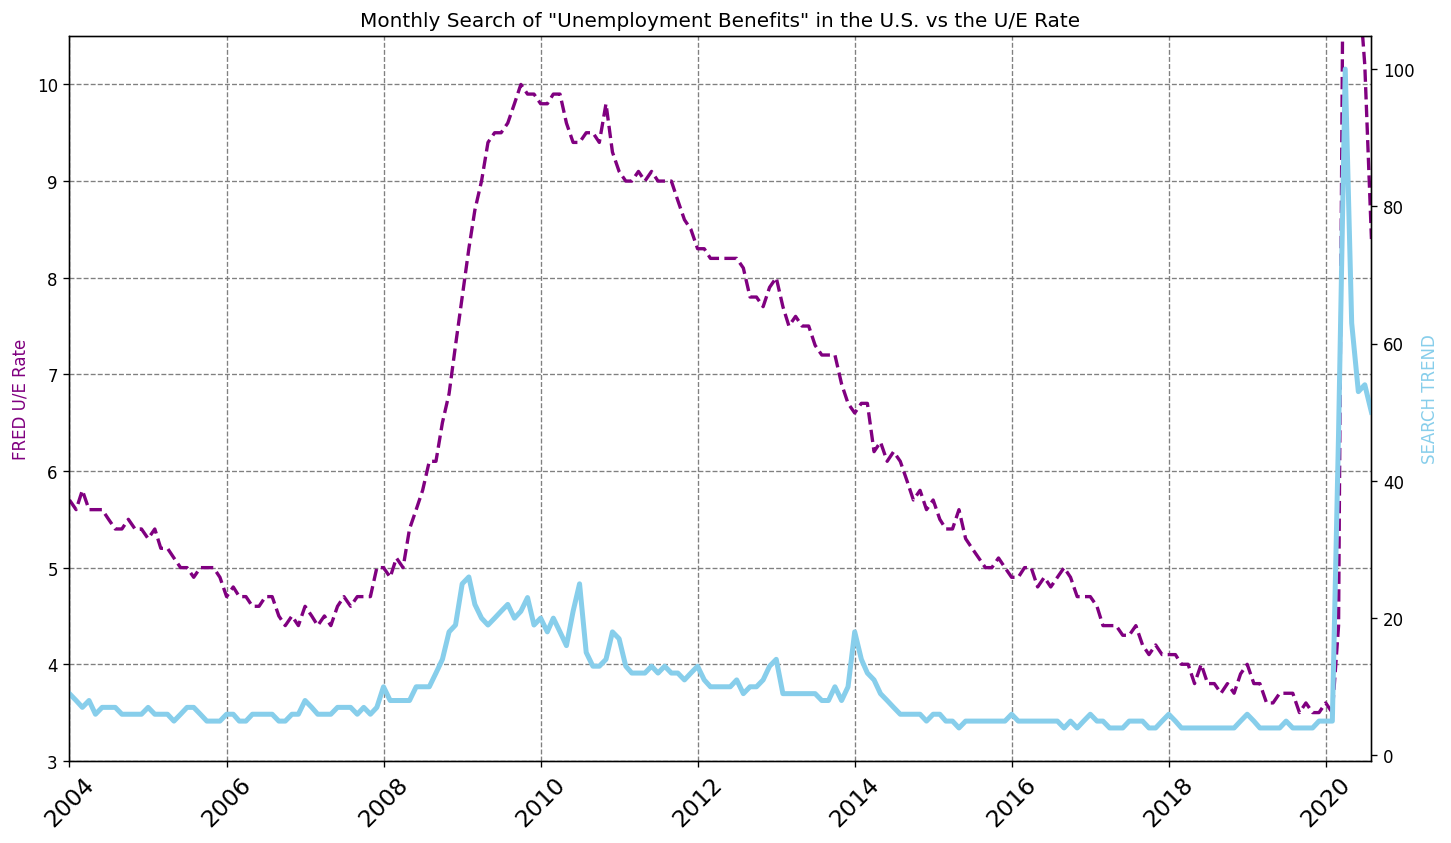

In [94]:
plt.figure(figsize=(14,8),dpi=120)
plt.xticks(fontsize=14,rotation=45)
ax1=plt.gca()
ax2=ax1.twinx()
ax1.grid(color='grey',linestyle='--')
ax1.set_ylabel('FRED U/E Rate', color='purple')
ax2.set_ylabel('SEARCH TREND', color='skyblue')
plt.xlabel('YEAR',fontsize=14)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')

# Set the minimum and maximum values on the axes
ax1.set_ylim([3, 10.5])
ax1.set_xlim([df_unemployement.MONTH.min(), df_unemployement.MONTH.max()])

# Calculate the rolling average over a 6 month window
# roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
# ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
# ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

ax1.plot(df_unemployement.MONTH, df_unemployement.UNRATE,color='purple',linewidth=2,linestyle='dashed')
ax2.plot(df_unemployement.MONTH,df_unemployement.UE_BENEFITS_WEB_SEARCH,color='skyblue',linewidth=3)
plt.show()